In [10]:
import xlrd
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def train(j):
    if j == 0:
        str = 'weight'
    if j == 1:
        str = 'height'
    if j == 2:
        str = 'size'
    v1 = pd.read_excel('1.xlsx')
    datemat1 = []  # man
    datemat0 = []  # woman
    for i in range(len(v1)):
        if v1['sex'][i] == '男':
            datemat1.append(v1[str][i])
        else:
            datemat0.append(v1[str][i])
    miu1 = 0.0
    miu0 = 0.0  # 均值
    for i in datemat1:
        miu1 += float(i)
    miu1 /= len(datemat1)
    for i in datemat0:
        miu0 += float(i)
    miu0 /= len(datemat0)
    sgmf1 = 0.0  # 方差
    sgmf0 = 0.0
    for i in datemat1:
        sgmf1 += (float(i) - miu1) ** 2
    sgmf1 /= len(datemat1)
    bzc1 = np.math.sqrt(sgmf1)
    for i in datemat0:
        sgmf0 += (float(i) - miu0) ** 2
    sgmf0 /= len(datemat0)
    bzc0 = np.math.sqrt(sgmf0)
    # 绘制两条正态分布曲线
    # linspace创建等差数列,在x方向上取采样点
    x1 = np.linspace(miu1 - 3 * bzc1, miu1 + 3 * bzc1, 50)
    x0 = np.linspace(miu0 - 3 * bzc0, miu0 + 3 * bzc0, 50)
    # 用正态分布概率密度函数得到采样点的y值序列
    y1 = np.exp(-(x1 - miu1) ** 2 / (2 * sgmf1)) / (np.math.sqrt(2 * np.math.pi) * bzc1)
    y0 = np.exp(-(x0 - miu0) ** 2 / (2 * sgmf0)) / (np.math.sqrt(2 * np.math.pi) * bzc0)

    plt.plot(x1, y1, "b-", linewidth=2)
    plt.plot(x0, y0, "r-", linewidth=2)
    plt.xlabel(str)
    plt.ylabel('Probability Density')
    plt.title('The probability density function of the class condition')
    plt.grid(True)  # 显示网格
    plt.show()
    # 绘制ROC曲线
    # 从女生曲线的-4sigma到男生曲线的4sigma获取采样点
    cy = np.linspace(miu0 - 4 * bzc0, miu1 + 4 * bzc1, 50)
    # 对应位置的假阳性率(误识率)的列表
    FPR = []
    # 对应位置的真阳性率(召回率=1-拒识率)
    RECALL = []

    # 生成误识率列表,即ROC曲线横坐标采样点
    for value in cy:
        FPR.append(1 - scipy.stats.norm(miu0, sgmf0).cdf(value))
        # norm函数生成一个给定均值和标准差的正态分布
    # cdf累计分布函数
    # sf残存函数(1-cdf)
    # 生成召回率列表,即ROC曲线纵坐标采样点
    for value in cy:
        RECALL.append(1 - scipy.stats.norm(miu1, sgmf1).cdf(value))
    plt.plot(FPR, RECALL, "g-", linewidth=2)
    plt.xlabel('FPR')
    plt.ylabel('RECALL')
    plt.title('ROC curve (if use ' + str + ' as feature)')
    plt.grid(True)
    plt.show()
    return miu1, miu0, bzc1, bzc0

FPR.append(1-scipy.stats.norm(miu0,sgmf0).cdf(value))

Scipy的stats模块包含了多种概率分布的随机变量，随机变量分为连续和离散两种。所有连续随机变量都是rv_continuous的派生类的对象，而所有的离散随机变量都是rv_discrete的派生类的对象。

正态分布 均值、方差

cdf(x, loc=0, scale=1) 	输入x，返回概率，既密度函数的面积

In [3]:
def test(miu1, miu0, bzc1, bzc0, x):
    # 计算似然比阈值p(w0)/p(w1)
    rambda = 0.5 / 0.5
    # 认为女男出现的先验概率是一样的
    # 计算两个似然度p(x|w1)和p(x|w0)
    pxw1 = np.exp(-(x - miu1) ** 2 / (2 * bzc1 ** 2)) / (np.math.sqrt(2 * np.math.pi) * bzc1)
    pxw0 = np.exp(-(x - miu0) ** 2 / (2 * bzc0 ** 2)) / (np.math.sqrt(2 * np.math.pi) * bzc0)
    # 计算似然比
    likelihood_ratio = pxw1 / pxw0
    # 与似然比阈值比较,以作判别
    if likelihood_ratio < rambda:
        return 0
    else:
        return 1

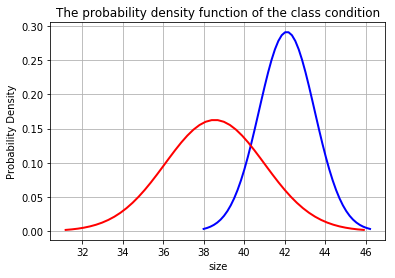

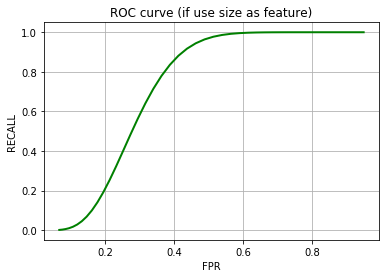

In [4]:
miu1, miu0, bzc1, bzc0 = train(2)

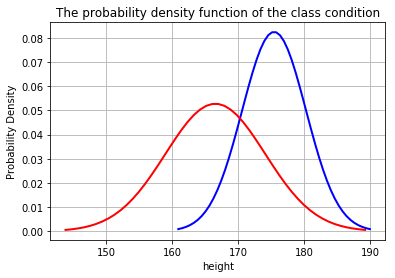

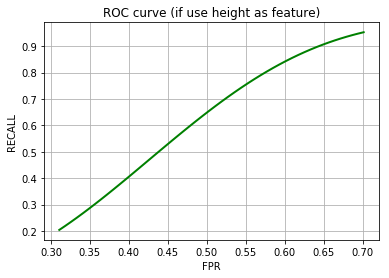

(175.40740740740742, 166.5, 4.840104523352999, 7.566372975210778)

In [10]:
train(1)

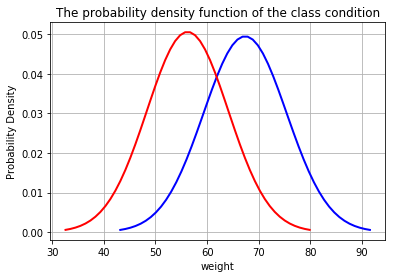

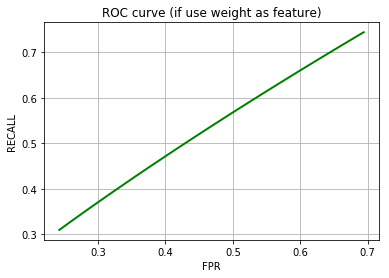

(67.37037037037037, 56.225, 8.065234712885726, 7.887450475280336)

In [11]:
train(0)

## 调整似然比阈值

In [44]:
def test(miu1, miu0, bzc1, bzc0, x):
    # 计算似然比阈值p(w0)/p(w1)
    rambda = 1/4
    # 计算两个似然度p(x|w1)和p(x|w0)
    pxw1 = np.exp(-(x - miu1) ** 2 / (2 * bzc1 ** 2)) / (np.math.sqrt(2 * np.math.pi) * bzc1)
    pxw0 = np.exp(-(x - miu0) ** 2 / (2 * bzc0 ** 2)) / (np.math.sqrt(2 * np.math.pi) * bzc0)
    # 计算似然比
    likelihood_ratio = pxw1 / pxw0
    # 与似然比阈值比较,以作判别
    if likelihood_ratio < rambda:
        return 0
    else:
        return 1

In [45]:
def train(j):
    if j == 0:
        str = 'weight'
    if j == 1:
        str = 'height'
    if j == 2:
        str = 'size'
    v1 = pd.read_excel('1.xlsx')
    datemat1 = []  # man
    datemat0 = []  # woman
    for i in range(len(v1)):
        if v1['sex'][i] == '男':
            datemat1.append(v1[str][i])
        else:
            datemat0.append(v1[str][i])
    miu1 = 0.0
    miu0 = 0.0  # 均值
    for i in datemat1:
        miu1 += float(i)
    miu1 /= len(datemat1)
    for i in datemat0:
        miu0 += float(i)
    miu0 /= len(datemat0)
    sgmf1 = 0.0  # 方差
    sgmf0 = 0.0
    for i in datemat1:
        sgmf1 += (float(i) - miu1) ** 2
    sgmf1 /= len(datemat1)
    bzc1 = np.math.sqrt(sgmf1)
    for i in datemat0:
        sgmf0 += (float(i) - miu0) ** 2
    sgmf0 /= len(datemat0)
    bzc0 = np.math.sqrt(sgmf0)
    # 绘制两条正态分布曲线
    # linspace创建等差数列,在x方向上取采样点
    x1 = np.linspace(miu1 - 3 * bzc1, miu1 + 3 * bzc1, 50)
    x0 = np.linspace(miu0 - 3 * bzc0, miu0 + 3 * bzc0, 50)
    # 用正态分布概率密度函数得到采样点的y值序列
    y1 = np.exp(-(x1 - miu1) ** 2 / (2 * sgmf1)) / (np.math.sqrt(2 * np.math.pi) * bzc1)
    y0 = np.exp(-(x0 - miu0) ** 2 / (2 * sgmf0)) / (np.math.sqrt(2 * np.math.pi) * bzc0)
    
    xx=np.linspace(miu0 - 3 * bzc0,miu1 + 3 * bzc1, 50)
    yy=np.zeros((1,50))
    for i in range (50):
        if 0==test(miu1, miu0, bzc1, bzc0, xx[i]):
            plt.scatter(xx[i],yy[0][i],c='r')
        else:
            plt.scatter(xx[i],yy[0][i],c='b')

    plt.plot(x1, y1, "b-", linewidth=2)
    plt.plot(x0, y0, "r-", linewidth=2)
    plt.xlabel(str)
    plt.ylabel('Probability Density')
    plt.title(' prior probability 1/4')
    plt.grid(True)  # 显示网格
    plt.show()
   
    return miu1, miu0, bzc1, bzc0

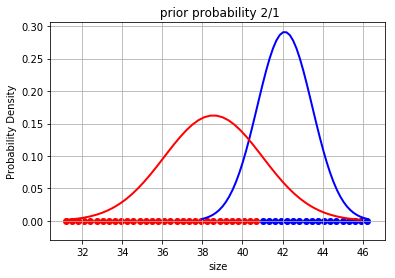

In [35]:
miu1, miu0, bzc1, bzc0 = train(2)

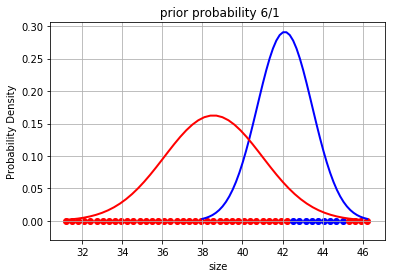

In [38]:
miu1, miu0, bzc1, bzc0 = train(2)

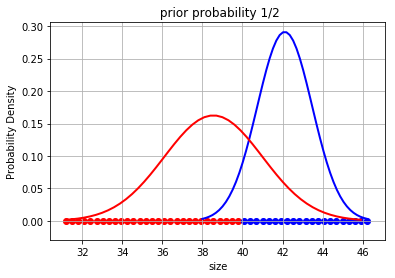

In [43]:
miu1, miu0, bzc1, bzc0 = train(2)

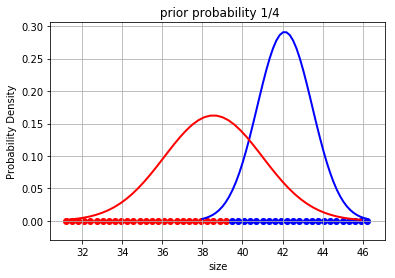

In [46]:
miu1, miu0, bzc1, bzc0 = train(2)

核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一

# Parzen窗估计（Parzen window）
## 一、窗函数与窗宽
Parzen窗估计通过改变区域内的样本数来获得估计序列。先举一个简单的例子：设 Rn 是一个窗宽为 hn 的 d 维超立方体，则局部区域的体积为 Vn=hdn 。定义窗函数 ϕ(u) ：

ϕ(u)=1 |uj|≥1/2;

    =0 otherwise.
    
from https://www.cnblogs.com/Determined22/p/6349871.html?utm_source=itdadao&utm_medium=referral

## 二、不同的窗宽对密度函数的估计效果产生的作用

      设 hn=h1/√n，那么通过改变参数 h1 就可获得窗宽不同的模型（ n 相同时这些模型有着不同的窗宽）。当然了，窗宽序列的获取当然不是只有这一种途径，一般原则是当 n 越大时 hn 越小。[1]中首先讨论的是有限样本的情况，使用高斯窗函数，得到的结果是：在样本数有限的情况下，太大的窗宽会是高方差的，欠拟合；太小的窗宽会是低方差的，过拟合；窗宽较大时，平滑程度较大。理论上的证明这里就不赘述了（其实我也没细看。。。），；收敛性也不细说了，在 pn(x) 收敛到一个值后，这个值是 p(x) 被窗函数平滑的结果，pn(x) 的期望是 p(x)的平滑（卷积）。

      [1]里继续用高斯窗函数的情况下讨论样本数无穷时去估计概率密度（有单模的高斯密度，也有多模的混合密度），得到的结果是：当样本数无穷时，不管窗宽多大，最后总能准确地估计出真实概率密度。

      下面这张图就展示了真实密度是多模的情况下，取不同窗宽（每一列代表一个模型，从左到右窗宽依次减小）时，样本数从有限到无限（从上到下样本数依次增大）的估计效果，可以对照上面两个结论来看这张图。能够估计多模的密度，这正是非参数方法可以做到而参数方法所做不到的。

In [6]:
from numpy import *
def TraBys(i):
    f = open(r'boynew.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float, line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    dataarray1 = np.array(data_list)
    f = open(r'girlnew.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float, line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    dataarray0 = np.array(data_list)


    '''
    dataarray1 man
    dataarray0 woman
    '''

    if i==0:
        start=140
        end=190
    elif i==1:
        start=30
        end=90
    elif i==2:
        start=30
        end=50
    x1=np.linspace(start,end,10000)
    # print(x1-dataarray1[0][i])
    h1=4
    sigma1 = h1 / np.sqrt(len(dataarray1))
    sigma0 = h1 / np.sqrt(len(dataarray0))
    data=np.exp(-(x1-dataarray1[0][i])**2/(2*sigma1**2))/(np.sqrt(np.math.pi*2)*sigma1)
    # print(data)
    for j in dataarray1:
           # print(j[i+1])
        y1=np.exp(-(x1-j[i])**2/(2*sigma1**2))/(np.sqrt(np.math.pi*2)*sigma1)
            # plt.plot(x1,y1,"g-",linewidth=0.01)
        data=data+y1;

    data0 = np.exp(-(x1 - dataarray0[0][i]) ** 2 / (2*sigma0**2)) / (np.sqrt(np.math.pi * 2) * sigma0)
    for j in dataarray0:
            #     print(j[i+1])
        y0 = np.exp(-(x1 - j[i]) ** 2 / (2*sigma0**2)) / (np.sqrt(np.math.pi * 2) * sigma0)
            #    plt.plot(x1, y0, "y-", linewidth=0.01)
        data0 = data0 + y0;
    data0=data0/len(dataarray0)
    data = data / len(dataarray1)
    plt.plot(x1, data0, "r-", linewidth=1)
    plt.plot(x1, data, "b-", linewidth=1)
    plt.show()

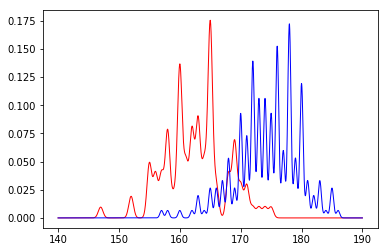

In [7]:
TraBys(0)

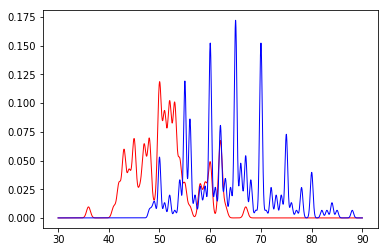

In [8]:
TraBys(1)

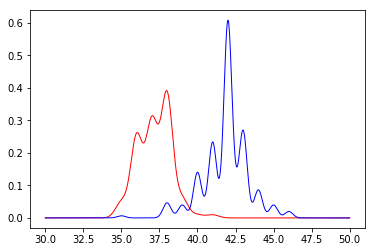

In [9]:
TraBys(2)